In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
import xgboost as xgb  # XGBoost for better performance


In [2]:
import pandas as pd

# Load datasets
data_train = pd.read_csv("fraudTrain.csv")
data_test = pd.read_csv("fraudTest.csv")

# Combine train and test datasets
full_data = pd.concat([data_train, data_test])

# Drop any missing values (if necessary)
full_data = full_data.dropna()



In [3]:
# Separate the target variable (y) and features (X)
X = full_data.drop('is_fraud', axis=1)  # Drop the target column from features
y = full_data['is_fraud']  # Define the target column

# Check the shapes to confirm they’re correct
print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (1852394, 22), y shape: (1852394,)


In [4]:
# Drop irrelevant non-numeric columns
unused_cols = ['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street',
               'gender', 'job', 'city', 'state', 'dob', 'trans_num', 'merchant']
X = X.drop(columns=unused_cols, errors='ignore')

# Optionally, encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Check if all columns are numeric
print(X.dtypes)


cc_num                       int64
amt                        float64
zip                          int64
lat                        float64
long                       float64
city_pop                     int64
unix_time                    int64
merch_lat                  float64
merch_long                 float64
category_food_dining          bool
category_gas_transport        bool
category_grocery_net          bool
category_grocery_pos          bool
category_health_fitness       bool
category_home                 bool
category_kids_pets            bool
category_misc_net             bool
category_misc_pos             bool
category_personal_care        bool
category_shopping_net         bool
category_shopping_pos         bool
category_travel               bool
dtype: object


In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize and apply the scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [6]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f"Resampled X shape: {X_res.shape}")
print(f"Resampled y shape: {y_res.shape}")


Resampled X shape: (3685486, 22)
Resampled y shape: (3685486,)


In [7]:
from sklearn.model_selection import train_test_split

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Confirm the shapes
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (2948388, 22), X_test shape: (737098, 22)
y_train shape: (2948388,), y_test shape: (737098,)


In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)


Accuracy: 0.9988237656322497
Precision: 0.9980271863997641
Recall: 0.9996259473290471
F1 Score: 0.9988259271045629

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368166
           1       1.00      1.00      1.00    368932

    accuracy                           1.00    737098
   macro avg       1.00      1.00      1.00    737098
weighted avg       1.00      1.00      1.00    737098



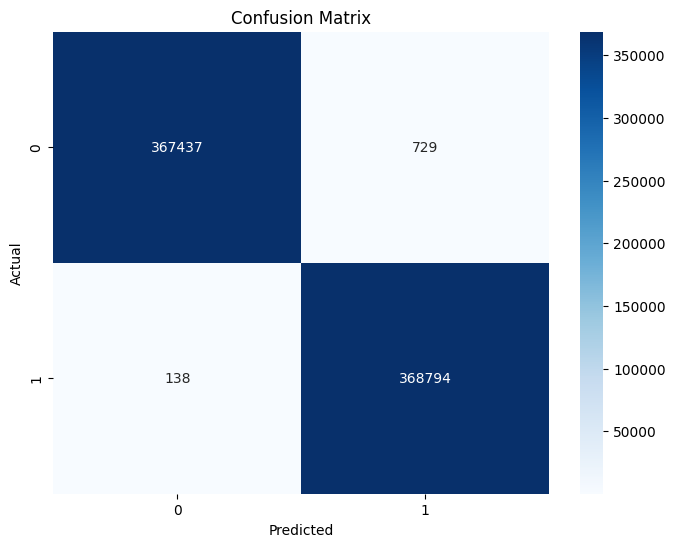

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

# Display the classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [10]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(scale_pos_weight=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print('\nXGBoost Classification Report:\n', classification_report(y_test, y_pred_xgb))



XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96    368166
           1       0.94      1.00      0.97    368932

    accuracy                           0.97    737098
   macro avg       0.97      0.97      0.97    737098
weighted avg       0.97      0.97      0.97    737098



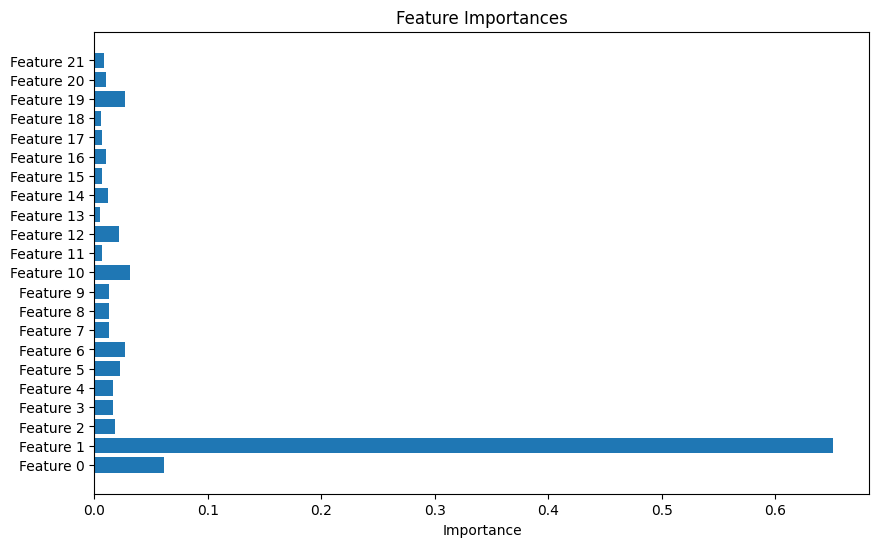

In [11]:
# Feature importance plot for RandomForest
importances = rf_model.feature_importances_
feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [12]:
import joblib

# Save the model
joblib.dump(rf_model, 'fraud_detection_rf_model.pkl')

# Load the model later if needed
loaded_model = joblib.load('fraud_detection_rf_model.pkl')


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the RandomForest model
print('\nRandomForest Classification Report:\n', classification_report(y_test, y_pred_rf))



RandomForest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368166
           1       1.00      1.00      1.00    368932

    accuracy                           1.00    737098
   macro avg       1.00      1.00      1.00    737098
weighted avg       1.00      1.00      1.00    737098



In [14]:
import joblib

# Load the saved RandomForest model
loaded_rf_model = joblib.load('fraud_detection_rf_model.pkl')


In [15]:
# Use the loaded model to make predictions
y_pred = loaded_rf_model.predict(X_test)


In [17]:
print("RandomForest Model - First 10 Predictions:")
for i in range(10):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred_rf[i]}")


RandomForest Model - First 10 Predictions:
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0


In [18]:
import pandas as pd

results_rf = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_rf})


print("\nFirst 10 Results:")
print(results_rf.head(10))



First 10 Results:
   Actual  Predicted
0       1          1
1       0          0
2       0          0
3       1          1
4       0          0
5       0          0
6       1          1
7       1          1
8       1          1
9       0          0


In [20]:
# Identify and display incorrect predictions
incorrect_rf = results_rf[results_rf['Actual'] != results_rf['Predicted']]

print("\nIncorrect Predictions (RandomForest):")
print(incorrect_rf.head(10))



Incorrect Predictions (RandomForest):
      Actual  Predicted
313        0          1
811        0          1
1480       0          1
3841       0          1
4634       0          1
4947       0          1
5299       0          1
5886       0          1
6555       1          0
9120       0          1


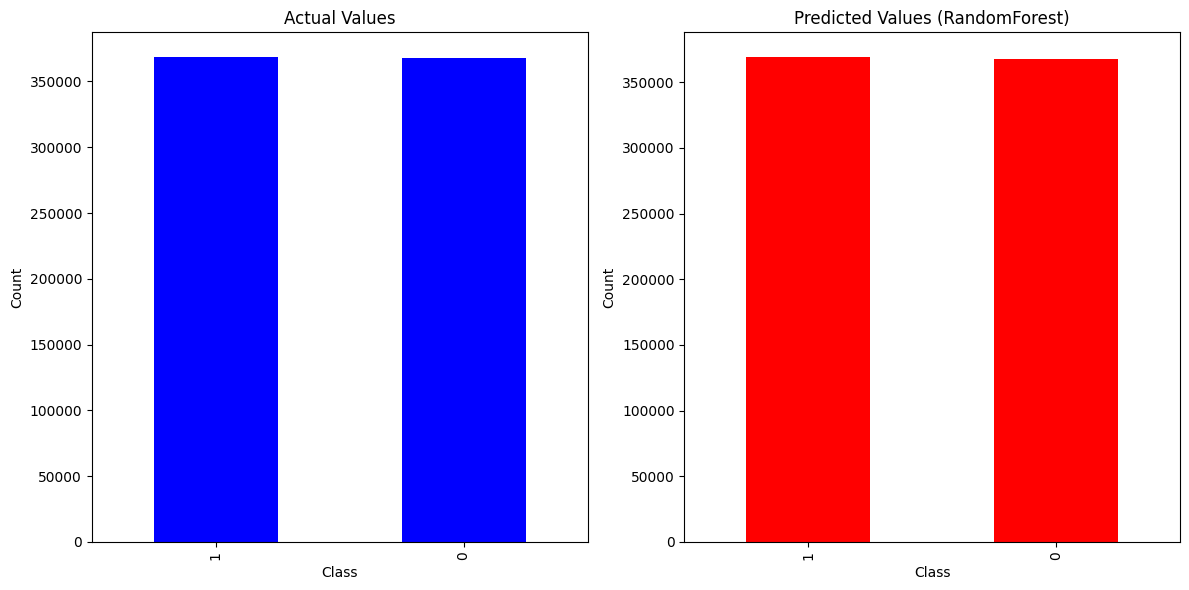

In [21]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot actual values
results_rf['Actual'].value_counts().plot(kind='bar', ax=ax[0], title='Actual Values', color='blue')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')

# Plot predicted values
results_rf['Predicted'].value_counts().plot(kind='bar', ax=ax[1], title='Predicted Values (RandomForest)', color='red')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)


print("RandomForest Model - Performance Metrics:")
print(f"Accuracy:  {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1 Score:  {f1_rf:.4f}")


RandomForest Model - Performance Metrics:
Accuracy:  0.9988
Precision: 0.9980
Recall:    0.9996
F1 Score:  0.9988


In [24]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)


print("XGBoost Model - Performance Metrics:")
print(f"Accuracy:  {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall:    {recall_xgb:.4f}")
print(f"F1 Score:  {f1_xgb:.4f}")

XGBoost Model - Performance Metrics:
Accuracy:  0.9655
Precision: 0.9355
Recall:    1.0000
F1 Score:  0.9667
